In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [7]:
data = pd.read_csv('data/data.csv').drop('Unnamed: 0', axis = 1)

In [8]:
data['revenue'] = np.where(data['purchase'] == False, 0, 15)
data.replace({True: 1, False: 0}, inplace = True)
data.head()

,uid,timestamp,channel,clickthrough,purchase,gender,age,revenue
0,2697588,2021-01-01 08:00:00,facebook,0,0,Female,Gen Alpha,0
1,2697588,2021-01-02 08:00:00,email,0,0,Female,Gen Alpha,0
2,2697588,2021-01-02 09:20:00,search,0,0,Female,Gen Alpha,0
3,2697588,2021-01-02 10:40:00,search,0,1,Female,Gen Alpha,15
4,2697588,2021-01-02 12:00:00,facebook,0,0,Female,Gen Alpha,0


<AxesSubplot:xlabel='channel'>

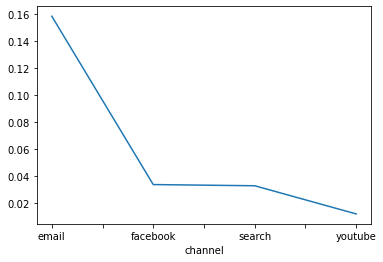

In [12]:
channels = data.groupby('channel')['revenue'].mean()
channels.plot()

<AxesSubplot:ylabel='gender,channel'>

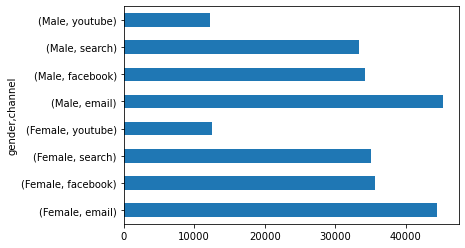

In [18]:
gender = data.groupby(['gender', 'channel'])['revenue'].sum()
gender.plot(kind = 'barh')

In [22]:
data.groupby(['gender', 'age', 'channel'])['revenue'].sum()

gender  age        channel 
Female  Boomer     email        4170
                   facebook     3780
                   search       3600
                   youtube      1365
        Gen Alpha  email       32385
                   facebook    25500
                   search      24510
                   youtube      8625
        Gen Z      email        3870
                   facebook     2970
                   search       3585
                   youtube      1215
        Millenial  email        4080
                   facebook     3420
                   search       3330
                   youtube      1275
Male    Boomer     email        4305
                   facebook     3075
                   search       3510
                   youtube      1155
        Gen Alpha  email       31725
                   facebook    24255
                   search      22740
                   youtube      8520
        Gen Z      email        4425
                   facebook     3015
          

In [29]:
conversions = data.groupby('channel')['purchase'].sum()
conversions

channel
email       5982
facebook    4662
search      4561
youtube     1650
Name: purchase, dtype: int64

In [30]:
clickthrough = data.groupby('channel')['clickthrough'].mean()

clickthrough

channel
email       0.009423
facebook    0.007676
search      0.007760
youtube     0.007850
Name: clickthrough, dtype: float64